In [59]:
from mp1 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import keras
from keras import regularizers
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import TensorBoard

## A bit of data exploration

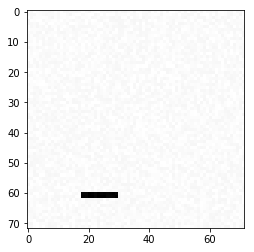

In [9]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

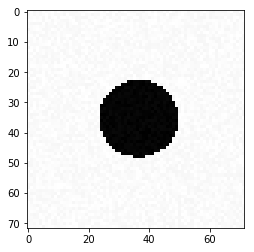

In [10]:
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

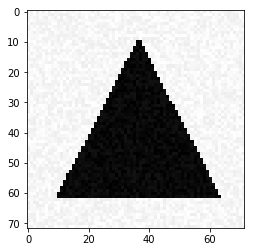

In [11]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

## A simple classification problem
Here we train a simple linear classifier to discriminate between rectangles, disks and triangles.

*Build and train a linear classifier in Keras to classify a image into one of the three possible
categories (i.e. rectangle, disk, triangle). Try using the stochastic gradient descent optimizer, then
the Adam optimizer.
Hints: You will have to use the following functions: Sequential, add, Dense (do not forget the
activation), compile, fit, np_utils.to_categorical. For the Adam optimizer, I used a batch size
of 32. You should use a small number of epochs when debugging to see if the optimization seems to
converge correctly.*

In [12]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [28]:
nb_classes = 3
input_dim = 72 * 72
Y_train_cat = np_utils.to_categorical(Y_train, nb_classes)

output_dim = nb_classes
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim))
model.add(Activation('softmax'))
batch_size = 32 
nb_epoch = 20

We train the model using Adam optimizer, a batch of 32, for 20 epochs. We check convergence by cross-validation: the training set is automatically split between 66% training data and 33% validation data.

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train_cat, batch_size=batch_size,
                    epochs=nb_epoch, verbose=1, validation_split=0.33)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 1ms/step - loss: 2.8242 - acc: 0.2850 - val_loss: 2.1273 - val_acc: 0.3600
Epoch 2/20
200/200 [==============================] - 0s 110us/step - loss: 1.7227 - acc: 0.3750 - val_loss: 2.1916 - val_acc: 0.3300
Epoch 3/20
200/200 [==============================] - 0s 144us/step - loss: 1.4769 - acc: 0.5150 - val_loss: 1.0776 - val_acc: 0.6200
Epoch 4/20
200/200 [==============================] - 0s 135us/step - loss: 0.8656 - acc: 0.6250 - val_loss: 1.0171 - val_acc: 0.5900
Epoch 5/20
200/200 [==============================] - 0s 141us/step - loss: 0.6254 - acc: 0.6850 - val_loss: 0.4778 - val_acc: 0.8000
Epoch 6/20
200/200 [==============================] - 0s 140us/step - loss: 0.4748 - acc: 0.8050 - val_loss: 0.4099 - val_acc: 0.9300
Epoch 7/20
200/200 [==============================] - 0s 150us/step - loss: 0.4040 - acc: 0.8500 - val_loss: 0.3729 - val_acc: 0.9100
Epoch 8/20
200/200

Training and validation accuracy are almost perfect for this simple task.

Checking the consistency of the results.
0 : rectangle, 1 : disk, 2 : triangle

In [30]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [31]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [32]:
X_test = generate_a_triangle(20, False)[0]
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

## Visulization of the solutions

*We would like to visualize the weights of the linear classifier. Check the output of the function
model.get_weights(): The first part corresponds to the matrix of the classifier. Its columns have
the same size as the input images, because Keras uses vector-matrix multiplications instead of matrix-
vector multiplications.
† Visualize the 3 columns as images.*

In [38]:
model.get_weights()[0].shape

(5184, 3)

In [39]:
col0 = model.get_weights()[0][:, 0] # rectangle
col1 = model.get_weights()[0][:, 1] # disk
col2 = model.get_weights()[0][:, 2] # triangle

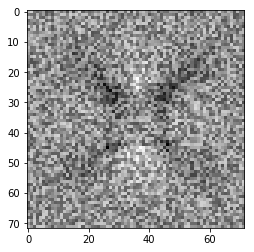

In [40]:
plt.imshow(col0.reshape(72,72), cmap='gray')

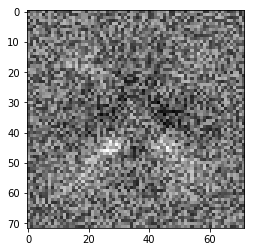

In [41]:
plt.imshow(col1.reshape(72,72), cmap='gray')

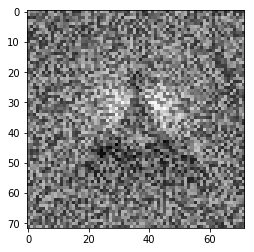

In [42]:
plt.imshow(col2.reshape(72,72), cmap='gray')

The shapes of the weights *roughly* correspond to caracteristic shapes of the three object classes.

## A more difficult classification problem
Now the problem becomes more difficult, as the shapes are allowed to move within the images and change dimensions.

In [43]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


First we try the same kind of linear model, but it fails on this problem.

In [44]:
nb_classes = 3
input_dim = 5184
Y_train_cat = np_utils.to_categorical(Y_train, nb_classes)

output_dim = nb_classes
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 32 
nb_epoch = 200

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, Y_train_cat, batch_size=batch_size, epochs=nb_epoch, 
                    verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 300 samples, validate on 300 samples
Epoch 1/200
300/300 [==============================] - 0s 929us/step - loss: 2.9446 - acc: 0.3100 - val_loss: 1.1526 - val_acc: 0.3633
Epoch 2/200
300/300 [==============================] - 0s 150us/step - loss: 1.6407 - acc: 0.3767 - val_loss: 1.0449 - val_acc: 0.5000
Epoch 3/200
300/300 [==============================] - 0s 166us/step - loss: 1.1369 - acc: 0.4300 - val_loss: 1.1068 - val_acc: 0.5233
Epoch 4/200
300/300 [==============================] - 0s 167us/step - loss: 1.1623 - acc: 0.3833 - val_loss: 1.1137 - val_acc: 0.3967
Epoch 5/200
300/300 [==============================] - 0s 155us/step - loss: 1.0846 - acc: 0.4067 - val_loss: 1.2340 - val_acc: 0.3833
Epoch 6/200
300/300 [==============================] - 0s 165us/step - loss: 1.0870 - acc: 0.4900 - val_loss: 1.0404 - val_acc: 0.4733
Epoch 7/200
300/300 [==============================] - 0s 152us/step - loss: 0.9357 - acc: 0.5400 - val_loss: 0.9256 - val_acc: 0.5000
Epoch 8/2

Epoch 61/200
300/300 [==============================] - 0s 147us/step - loss: 0.6498 - acc: 0.6633 - val_loss: 0.8956 - val_acc: 0.5867
Epoch 62/200
300/300 [==============================] - 0s 132us/step - loss: 0.5685 - acc: 0.7500 - val_loss: 0.9142 - val_acc: 0.5933
Epoch 63/200
300/300 [==============================] - 0s 163us/step - loss: 0.4947 - acc: 0.7933 - val_loss: 0.8962 - val_acc: 0.5400
Epoch 64/200
300/300 [==============================] - 0s 135us/step - loss: 0.5470 - acc: 0.7633 - val_loss: 0.8789 - val_acc: 0.5567
Epoch 65/200
300/300 [==============================] - 0s 145us/step - loss: 0.4785 - acc: 0.8200 - val_loss: 0.8659 - val_acc: 0.5767
Epoch 66/200
300/300 [==============================] - 0s 144us/step - loss: 0.4899 - acc: 0.8067 - val_loss: 0.9470 - val_acc: 0.5733
Epoch 67/200
300/300 [==============================] - 0s 143us/step - loss: 0.5081 - acc: 0.7633 - val_loss: 1.2726 - val_acc: 0.5600
Epoch 68/200
300/300 [==========================

300/300 [==============================] - 0s 143us/step - loss: 0.4261 - acc: 0.8200 - val_loss: 0.9621 - val_acc: 0.5933
Epoch 122/200
300/300 [==============================] - 0s 116us/step - loss: 0.3452 - acc: 0.8667 - val_loss: 0.9244 - val_acc: 0.5600
Epoch 123/200
300/300 [==============================] - 0s 140us/step - loss: 0.3657 - acc: 0.8500 - val_loss: 0.9804 - val_acc: 0.6000
Epoch 124/200
300/300 [==============================] - 0s 144us/step - loss: 0.3888 - acc: 0.8200 - val_loss: 0.9366 - val_acc: 0.6067
Epoch 125/200
300/300 [==============================] - 0s 145us/step - loss: 0.3240 - acc: 0.8900 - val_loss: 0.9043 - val_acc: 0.5567
Epoch 126/200
300/300 [==============================] - 0s 142us/step - loss: 0.3328 - acc: 0.8900 - val_loss: 0.9036 - val_acc: 0.5600
Epoch 127/200
300/300 [==============================] - 0s 143us/step - loss: 0.4121 - acc: 0.8200 - val_loss: 0.9012 - val_acc: 0.5700
Epoch 128/200
300/300 [==============================] 

Epoch 181/200
300/300 [==============================] - 0s 133us/step - loss: 0.2773 - acc: 0.9300 - val_loss: 1.0744 - val_acc: 0.5733
Epoch 182/200
300/300 [==============================] - 0s 142us/step - loss: 0.3347 - acc: 0.8533 - val_loss: 0.9448 - val_acc: 0.5733
Epoch 183/200
300/300 [==============================] - 0s 138us/step - loss: 0.2771 - acc: 0.9033 - val_loss: 1.1521 - val_acc: 0.5867
Epoch 184/200
300/300 [==============================] - 0s 126us/step - loss: 0.3530 - acc: 0.8467 - val_loss: 1.0023 - val_acc: 0.5933
Epoch 185/200
300/300 [==============================] - 0s 128us/step - loss: 0.2508 - acc: 0.9467 - val_loss: 0.9392 - val_acc: 0.5633
Epoch 186/200
300/300 [==============================] - 0s 138us/step - loss: 0.2556 - acc: 0.9333 - val_loss: 0.9878 - val_acc: 0.5733
Epoch 187/200
300/300 [==============================] - 0s 147us/step - loss: 0.2458 - acc: 0.9433 - val_loss: 0.9454 - val_acc: 0.5533
Epoch 188/200
300/300 [==================

We get a test accuracy of only 55%. So we try to replace the model by a simple convolutional network, and increase the number of training examples to 500.

*Train a convolutional (not-too-)deep network on this new dataset. What is the value of the loss
function on this test set when using your deep network?
Hints: You can limit yourself to 1 convolutional layer with 16 5×5 filters, 1 pooling layer, and
one fully connected layer, but you are free to use any other architecture. You are allowed to increase
the number of training samples if you want to.*

In [46]:
[X_train, Y_train] = generate_dataset_classification(500, 20, True)
X_train  = X_train.reshape((-1, 72, 72, 1))
[X_test, Y_test] = generate_test_set_classification()
X_test  = X_test.reshape((-1, 72, 72, 1))

nb_classes = 3
input_shape = (72, 72, 1)
Y_train_cat = np_utils.to_categorical(Y_train, nb_classes)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [50]:
output_dim = nb_classes
cmodel = Sequential() 
cmodel.add(Conv2D(16, kernel_size=(5, 5),# strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
cmodel.add(MaxPooling2D(pool_size=5, strides=1, padding='valid', data_format='channels_last'))
cmodel.add(Flatten())
cmodel.add(Dense(output_dim, activation='softmax'))
batch_size = 64
nb_epoch = 20

In [51]:
cmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = cmodel.fit(X_train, Y_train_cat, batch_size=batch_size, epochs=nb_epoch, 
                    verbose=1, validation_data=(X_test, Y_test)) 
score = cmodel.evaluate(X_test, Y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 500 samples, validate on 300 samples
Epoch 1/20
500/500 [==============================] - 4s 8ms/step - loss: 3.5160 - acc: 0.3680 - val_loss: 1.4091 - val_acc: 0.5667
Epoch 2/20
500/500 [==============================] - 3s 7ms/step - loss: 1.0149 - acc: 0.5200 - val_loss: 0.9195 - val_acc: 0.5433
Epoch 3/20
500/500 [==============================] - 4s 7ms/step - loss: 0.7557 - acc: 0.6300 - val_loss: 0.7533 - val_acc: 0.6400
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 0.6356 - acc: 0.7580 - val_loss: 0.7068 - val_acc: 0.6433
Epoch 5/20
500/500 [==============================] - 4s 7ms/step - loss: 0.5548 - acc: 0.7960 - val_loss: 0.6647 - val_acc: 0.6967
Epoch 6/20
500/500 [==============================] - 3s 7ms/step - loss: 0.4777 - acc: 0.8100 - val_loss: 0.6157 - val_acc: 0.7267
Epoch 7/20
500/500 [==============================] - 3s 7ms/step - loss: 0.4051 - acc: 0.8900 - val_loss: 0.5927 - val_acc: 0.7500
Epoch 8/20
500/500 [==========

The accuracy on the test set is satisfying for this problem: 88%.

## A regression problem

*The task now is to predict the image locations of the vertices of a triangle, given an image of this triangle.*

First we normalize each triangle, so that the list of the vertices is uniquely defined. We perform a permutation (listing the vertices in trigonometric order), giving first the rightmost vertex, then the uppermost, and then the remaining one.

In [52]:
def reshape_coords(y):
    p = np.zeros((3, 2))
    p[0, :] = np.array([y[0], y[1]])
    p[1, :] = np.array([y[2], y[3]])
    p[2, :] = np.array([y[4], y[5]])
    
    d = np.argmax(p[:, 0])
    
    ind = [0, 1, 2]
    
    q = p.copy()
    p[d, :] = 0
    h = np.argmax(p[:, 1])
    
    srt = np.zeros((3, 2))
    srt[0] = q[d, :]
    ind.remove(d)
    srt[1] = p[h, :]
    ind.remove(h)
    
    srt[2] = p[ind[0], :]
    
    return srt.reshape((-1, ))

In [53]:
[X_train, Y_train] = generate_dataset_regression(2000, 20)
X_train  = X_train.reshape((-1, 72, 72, 1))
[X_test, Y_test] = generate_test_set_regression()
X_test  = X_test.reshape((-1, 72, 72, 1))

input_shape = (72, 72, 1)

for i in range(Y_test.shape[0]):
    Y_test[i] = reshape_coords(Y_test[i])
    
for i in range(Y_train.shape[0]):
    Y_train[i] = reshape_coords(Y_train[i])
  

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220


Get an idea of the task we must achieve and check that the normalization is consistent.

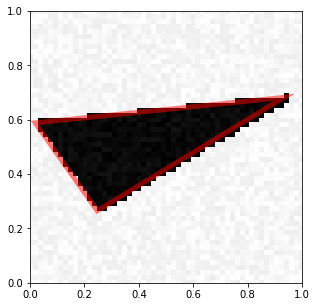

In [56]:
visualize_prediction(X_train[5], Y_train[5])

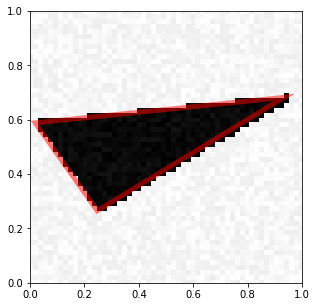

In [57]:
visualize_prediction(X_train[5], reshape_coords(Y_train[5]))

Define a suitable model. We monitor the train and test loss using tensorboard. We repeat for different architectures, and pick the ones that achives the best testing mean squared error. We also perform early stopping when the test loss stops decreasing.

We must keep in mind that the max-pooling layers are regularizers but they reduce the resolution, thus preventing us from achieving high accuracies. So we do not put a max-pooling after the second convolutional layer. The dropout layer acts as a regularizers, and it seems more efficient that directly penializing the weights of the convolutional filters (because it requires to tune one more parameter).

In [79]:
output_dim = 6
keras.backend.set_learning_phase(1)

rmodel = Sequential() 

rmodel.add(Conv2D(16, kernel_size=(5, 5),# strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
          #kernel_regularizer=regularizers.l2(0.001)))
# 16 conv 5 5 

rmodel.add(MaxPooling2D(pool_size=5, strides=3, padding='valid', data_format='channels_last')) 
# pool 5 strides 3 was best

rmodel.add(Dropout(0.25))

rmodel.add(Conv2D(32, kernel_size=(4, 4),# strides=(1, 1), # kernel 5 5
                 activation='relu',
                 input_shape=input_shape))
          #kernel_regularizer=regularizers.l2(0.001)))
# 32 kernels (3 3 or) 4 4 slightly better

#rmodel.add(MaxPooling2D(pool_size=2, strides=1, padding='valid', data_format='channels_last'))
# pool 2 str 1 -> remove it

rmodel.add(Flatten())

rmodel.add(Dense(output_dim))
batch_size = 16
nb_epoch = 150

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [80]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #0.01

rmodel.compile(optimizer=sgd, loss='mean_squared_error', metrics=['mean_squared_error']) 

history = rmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
                    verbose=1, validation_data=(X_test, Y_test), callbacks=[tensorboard]) 


Train on 2000 samples, validate on 300 samples
Epoch 1/150
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 2/150
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 3/150
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 4/150
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 5/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 6/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0

2000/2000 [==============================] - 9s 4ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 51/150
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 52/150
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 53/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 54/150
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 55/150
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 56/150
200

2000/2000 [==============================] - 9s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 100/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 101/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 102/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 103/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 104/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 105/15

2000/2000 [==============================] - 8s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 149/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 150/150
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0099 - val_mean_squared_error: 0.0099


In [95]:
keras.backend.set_learning_phase(0)

score = rmodel.evaluate(X_test, Y_test, verbose=1) 
print('Test MSE:', score[0])

300/300 [==============================] - 0s 2ms/step
Test MSE: 0.009957583161691824


This models achieves a test MSE of 0.00996.

Visualize the predictions on the train set...

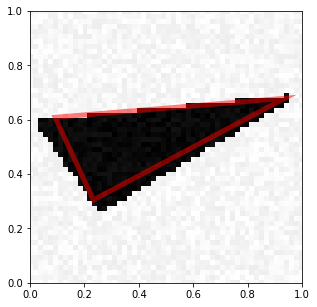

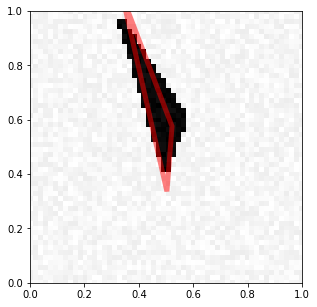

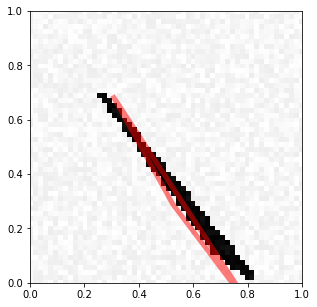

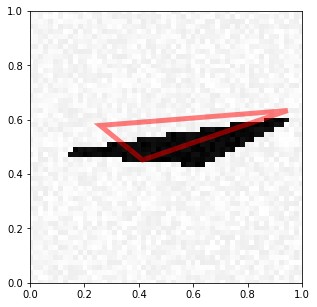

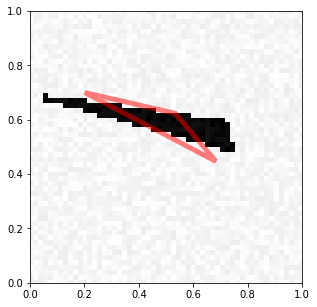

In [96]:
predt = rmodel.predict(X_train[5:10])

for i in range(5):
    visualize_prediction(X_train[5+i], predt[i])

... and on the test set

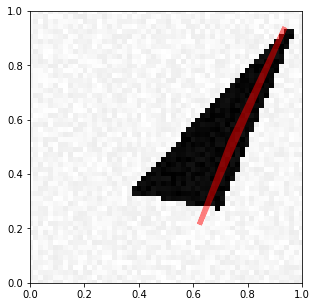

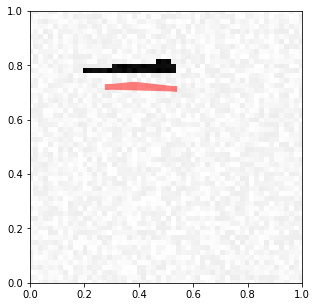

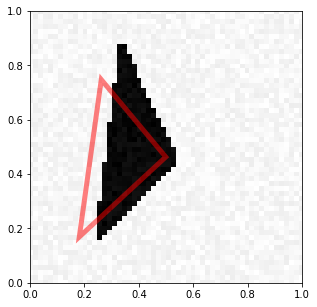

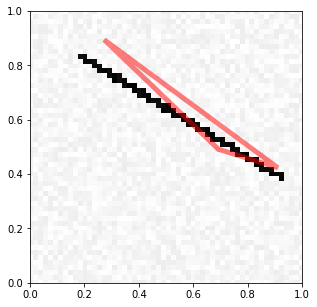

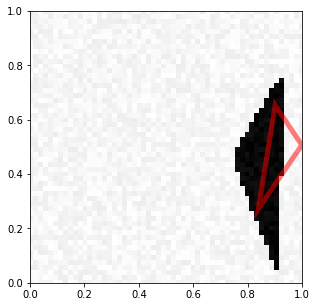

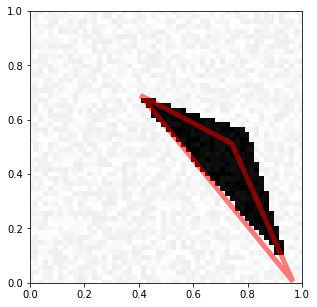

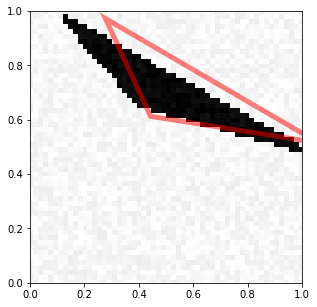

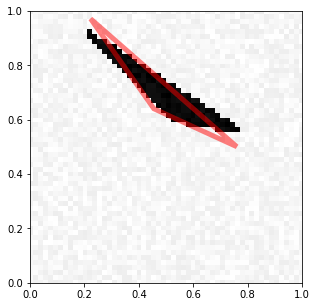

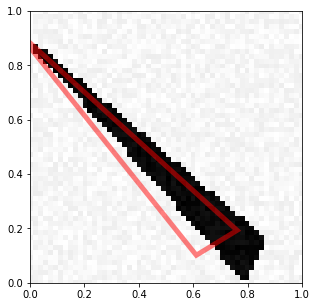

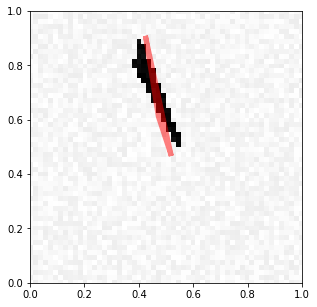

In [97]:
pred = rmodel.predict(X_test[:10])

for i in range(10):
    visualize_prediction(X_test[i], pred[i])